# Teleco Customer Churn Use Case
Teleco is a Telecom Company. They want to start new customer retention program. 
For this program they want to identify probability of a customer to churn?
It is important for them to understand possible reseason for customer churning, so that they can take measures to avoid that. 
In this study we are going to answer this questions using predictive modeling technique. So that Docomo can take actions to make churing customer happy and long reterning 

In [1]:
#Imports
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import classification_report

In [3]:
#To avoid warnings
import warnings
warnings.filterwarnings('ignore')

# 1. Data

In [5]:
df = pd.read_csv('data/data.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [7]:
# 6 Binary Features
# 9 Categorical Features with 3 category
# 1 4 Category
# 3 Numeric
# 1 Dependent variable 
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Let's understand each variable
customerID: Customer ID

gender: Whether the customer is a male or a female

SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)

Partner: Whether the customer has a partner or not (Yes, No)

Dependents: Whether the customer has dependents or not (Yes, No)

tenure: Number of months the customer has stayed with the company

PhoneService: Whether the customer has a phone service or not (Yes, No)

MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)

InternetService: Customer’s internet service provider (DSL, Fiber optic, No)

OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)

OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)

DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)

StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)

Contract: The contract term of the customer (Month-to-month, One year, Two year)

PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)

PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

MonthlyCharges: The amount charged to the customer monthly

TotalCharges: The total amount charged to the customer

Churn: Whether the customer churned or not (Yes or No)

# 2. Data Preprocessing 

In [9]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
#Convert MonthlyCharges to numeric value
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [11]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [12]:
#Check Missing Values
#Less than 1 percent is missing 
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
#Very few missing values, so we are going to drop 
df = df.dropna()
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
#Let's drop customer id
df_without_id = df.drop(['customerID'], axis = 1)

In [15]:
#Get Churn in new variable 
df_without_id['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df_without_id['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [16]:
#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df_without_id)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


# 3. Data Exploration

# Target Variable - Churn 
We can observe that around 2/3rd data is No. The given dataset is unbalanced. 

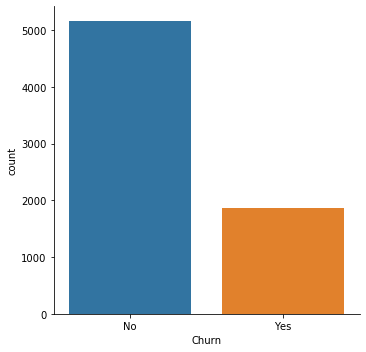

In [36]:
ax = sns.catplot(x="Churn", kind="count", data=df,  orient='v')

# Numeric Features 

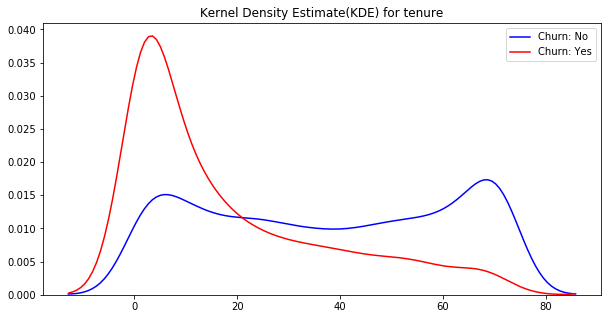

In [49]:
# Tenure Vs Churn 
# We can obeserve that High Intial Period Churn Rate. 
plt.figure(figsize=(10, 5))
plt.title("Kernel Density Estimate(KDE) for {}".format('tenure'))
ax0 = sns.kdeplot(df[df['Churn'] == 'No']['tenure'].dropna(), color= 'Blue', label= 'Churn: No')
ax1 = sns.kdeplot(df[df['Churn'] == 'Yes']['tenure'].dropna(), color= 'red', label= 'Churn: Yes')

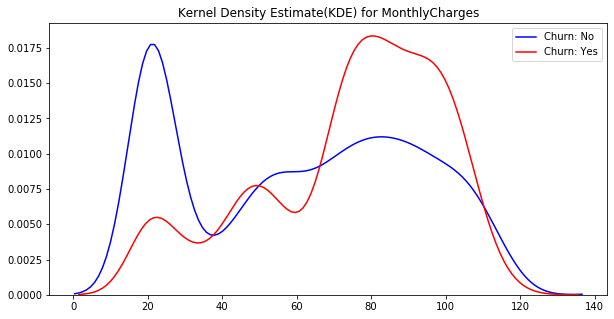

In [53]:
# MonthlyCharges Vs Churn 
# Low Charges --> Higher Customer Retention 
# High Charges --> 
plt.figure(figsize=(10, 5))
plt.title("Kernel Density Estimate(KDE) for {}".format('MonthlyCharges'))
ax0 = sns.kdeplot(df[df['Churn'] == 'No']['MonthlyCharges'].dropna(), color= 'Blue', label= 'Churn: No')
ax1 = sns.kdeplot(df[df['Churn'] == 'Yes']['MonthlyCharges'].dropna(), color= 'red', label= 'Churn: Yes')

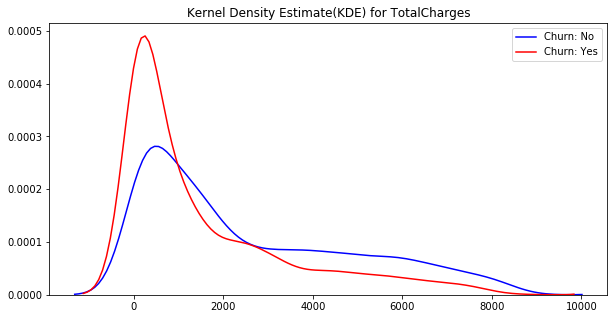

In [54]:
# MonthlyCharges Vs Churn 
# We can obeserve that High Intial Period Churn Rate.
plt.figure(figsize=(10, 5))
plt.title("Kernel Density Estimate(KDE) for {}".format('TotalCharges'))
ax0 = sns.kdeplot(df[df['Churn'] == 'No']['TotalCharges'].dropna(), color= 'Blue', label= 'Churn: No')
ax1 = sns.kdeplot(df[df['Churn'] == 'Yes']['TotalCharges'].dropna(), color= 'red', label= 'Churn: Yes')

# Categorical Features

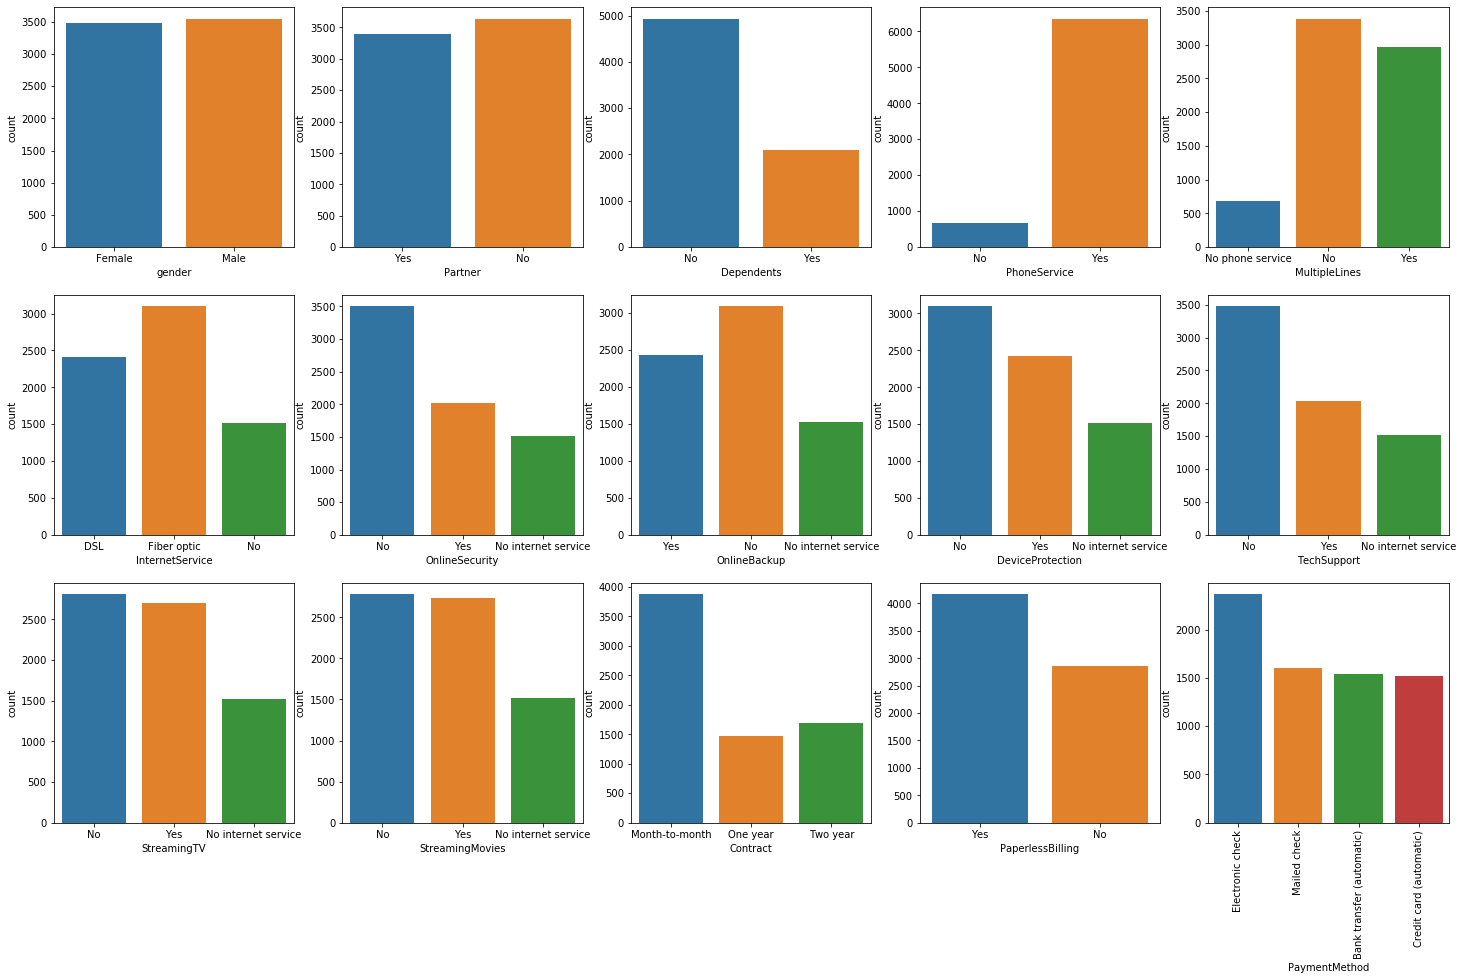

In [56]:
#Let's plot feautres 
fig, axes = plt.subplots(nrows = 3,ncols = 5,figsize = (25,15))
sns.countplot(x = "gender", data = df, ax=axes[0][0])
sns.countplot(x = "Partner", data = df, ax=axes[0][1])
sns.countplot(x = "Dependents", data = df, ax=axes[0][2])
sns.countplot(x = "PhoneService", data = df, ax=axes[0][3])
sns.countplot(x = "MultipleLines", data = df, ax=axes[0][4])
sns.countplot(x = "InternetService", data = df, ax=axes[1][0])
sns.countplot(x = "OnlineSecurity", data = df, ax=axes[1][1])
sns.countplot(x = "OnlineBackup", data = df, ax=axes[1][2])
sns.countplot(x = "DeviceProtection", data = df, ax=axes[1][3])
sns.countplot(x = "TechSupport", data = df, ax=axes[1][4])
sns.countplot(x = "StreamingTV", data = df, ax=axes[2][0])
sns.countplot(x = "StreamingMovies", data = df, ax=axes[2][1])
sns.countplot(x = "Contract", data = df, ax=axes[2][2])
sns.countplot(x = "PaperlessBilling", data = df, ax=axes[2][3])
ax = sns.countplot(x = "PaymentMethod", data = df, ax=axes[2][4])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show(fig)

[]

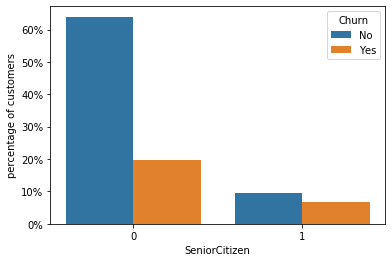

In [77]:
#Senior Citizen  
#Almost 41% Senior Citizer are planning to churn 
ratios = pd.DataFrame()
axis_name="percentage of customers"
g_df = df.groupby("SeniorCitizen")["Churn"].value_counts().to_frame()
g_df = g_df.rename({"Churn": axis_name}, axis=1).reset_index()
g_df[axis_name] = g_df[axis_name]/len(df)
ax = sns.barplot(x="SeniorCitizen", y= axis_name, hue='Churn', data=g_df, orient='v')
ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
ax.plot()

There is possibilty to analyze each feature against churn. Now I'm only considering only feature. 

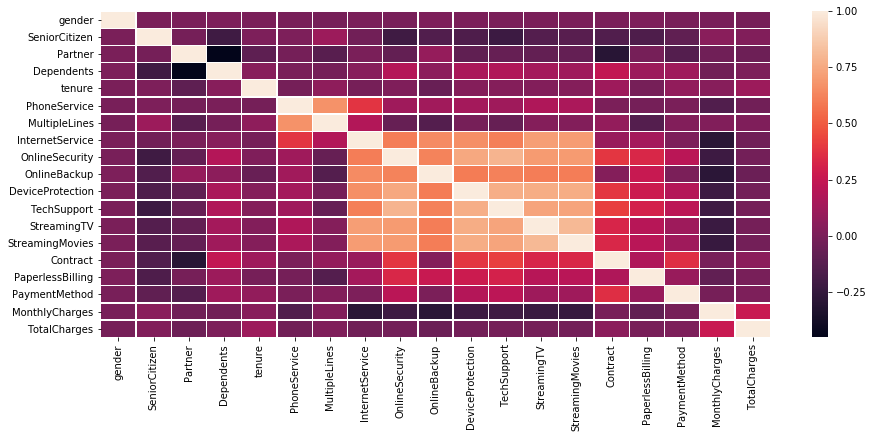

In [85]:
# Co-relation 
plt.figure(figsize=(15, 6))
temp_temp = df 
#temp_temp.drop(['customerID', 'Churn'], axis=1, inplace=True)
corr = temp_temp.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.3)

# 4. Data Preparation

In [21]:
#Let's create dataser for model traning
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])
#Scale Variables Between Value 0 to 1 
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features
#Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

# 5. Model Training

In [22]:
classifiers = [['LogisticRegression :', LogisticRegression()],
               ['Naive Bayes :', GaussianNB()],
               ['SVM :', SVC()],
               ['Random Forest:',RandomForestClassifier()]]

In [23]:
predictions_df = pd.DataFrame()
predictions_df['actual_labels'] = y_test
pred_model = []

In [25]:
for name,classifier in classifiers:
    print("--> Model : {}-------------------------------------------------------------------------".format(name))
    classifier = classifier
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    predictions_df[name.strip(" :")] = predictions
    print("Acuracy {}".format(accuracy_score(y_test, predictions)))
    #Check Confusion Matrix
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
    print("True Negatives: ",tn)
    print("False Positives: ",fp)
    print("False Negatives: ",fn)
    print("True Positives: ",tp)
    Precision = tp/(tp+fp) 
    print("Precision: {:0.2f}".format(Precision))
    Recall = tp/(tp+fn) 
    print("Recall: {:0.2f}".format(Recall))
    f1 = (2*Precision*Recall)/(Precision + Recall)
    print("F1 Score: {:0.2f}".format(f1))
    
    pred_model.append(classifier)    

--> Model : LogisticRegression :-------------------------------------------------------------------------
Acuracy 0.8227488151658767
True Negatives:  726
False Positives:  73
False Negatives:  114
True Positives:  142
Precision: 0.66
Recall: 0.55
F1 Score: 0.60
--> Model : Naive Bayes :-------------------------------------------------------------------------
Acuracy 0.6957345971563981
True Negatives:  523
False Positives:  276
False Negatives:  45
True Positives:  211
Precision: 0.43
Recall: 0.82
F1 Score: 0.57
--> Model : SVM :-------------------------------------------------------------------------
Acuracy 0.8180094786729858
True Negatives:  733
False Positives:  66
False Negatives:  126
True Positives:  130
Precision: 0.66
Recall: 0.51
F1 Score: 0.58
--> Model : Random Forest:-------------------------------------------------------------------------
Acuracy 0.8028436018957346
True Negatives:  732
False Positives:  67
False Negatives:  141
True Positives:  115
Precision: 0.63
Recall: 

In [26]:
#Once Glance At Predication Table
predictions_df.head()

,actual_labels,LogisticRegression,Naive Bayes,SVM,Random Forest
0,0,1,1,1,1
1,0,0,1,0,0
2,0,0,1,0,0
3,0,1,1,1,1
4,0,0,0,0,0


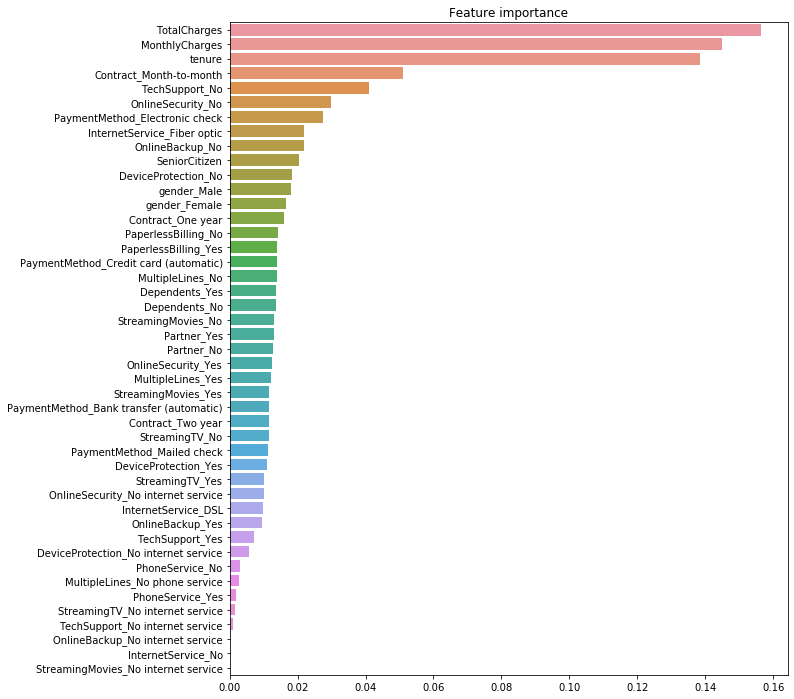

In [27]:
#Lets Plot Feautre Importance 
imp = pd.Series(data=pred_model[3].feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, orient='h')

# Summary

* All 3 Numerical features are important 
* More data exploaration can be done 
* Feature selection techinques can be used 
* Different alogrith can be used 